In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from datetime import datetime, time

def minutes(row): 
    return row//60

n=1
month = ['January', 'February', 'March', 'April', 'May', 'June']
df_global = pd.DataFrame(columns=['duration', 'trip_distance'])
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_zone = pd.read_csv('taxi_zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

while(n<7):
    csv_path = 'yellow_tripdata_2018-0'+str(n)+'.csv'
    
    df_taxi= pd.read_csv(csv_path, usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1')
    
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.month == n]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.month <= n+1]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'] != df_taxi['tpep_pickup_datetime']]
    df_taxi = df_taxi[df_taxi['trip_distance'] != 0.00]
    df_taxi = df_taxi[df_taxi['trip_distance'] <= 200]

    df_join = pd.merge(df_taxi,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])
    
    del df_taxi
    
    df_join['duration'] = df_join['tpep_dropoff_datetime']-df_join['tpep_pickup_datetime']
    df_join = df_join[df_join['duration'].dt.days == 0]
    df_join = df_join[df_join['duration'].dt.seconds <= (3600*4)]

    d_minutes = df_join['duration'].dt.seconds
    d_minutes = pd.DataFrame(d_minutes)
    d_minutes = d_minutes['duration'].apply(minutes)
    
    distance_duration_trip = pd.DataFrame(d_minutes)
    distance_duration_trip['trip_distance'] = df_join['trip_distance']
    
    df_global = df_global.append(distance_duration_trip)
        
    del df_join
    del d_minutes
    
    n += 1

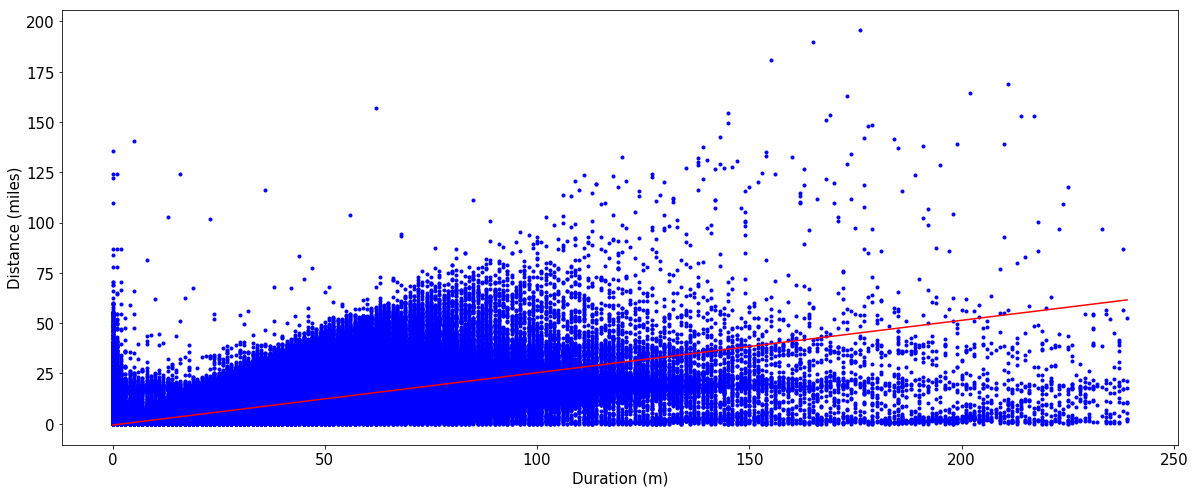

In [3]:
df_global['duration'] = pd.to_numeric(df_global['duration'])

x = df_global['duration'].tolist()
y = df_global['trip_distance'].tolist()
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=gradient*x1+intercept
fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(labelsize=15)
plt.xlabel('Duration (m)', fontsize=15)
plt.ylabel('Distance (miles)', fontsize=15)
plt.plot(x,y,'ob',markersize= 3)
plt.plot(x1,y1,'-r')
plt.show()

In [4]:
pearson = round(df_global['duration'].corr(df_global['trip_distance']),4)

In [5]:
pearson

0.7983